# Video: Visualizing the Upper Confidence Bound Algorithm

The UCB1 upper confidence bound algorithm is one of the most common bandit algorithms and forces regular testing of each arm by loosening upper bounds on expected performance.
This video will show you how that process works over time.

Script:
* Upper confidence bound or UCB algorithms are the most common way to implement multi-armed bandits.
* We will review the intuition

## Upper Confidence Bound (UCB) Approach

1. Pick every arm once to initialize data for each arm.
2. For all later actions,
  * For each arm, calculate an upper bound.
  * Pick the arm with the highest upper bound.

The upper bound calculation varies between different UCB algorithms.

Script:
* UCB algorithms work by calculating a likely upper bound on each arms average reward.
* Think of that bound as saying, "this is the top end of what's conceivable for this arm".
* Then the algorithm picks the arm with the highest upper bound.

## The UCB1 Algorithm

Upper bound calculation for $j$th arm: $\bar{x}_j + \sqrt{\frac{2 \ln n}{n_j}}$

* $\bar{x}_j$ is the average reward from the $j$th arm so far.
* $n_j$ is the number of times that the $j$th arm has been picked so far.
* $n$ is the total number of actions so far.

Rewards must be in the range $[0,1]$.

Script:
* The UCB1 algorithm is the most common choice for basic bandit problems.
* This upper bound calculation barely uses the arm statistics to decide whether to explore it more.
* So how does it work?
* The key details are the term in the square root on the right and the limitation to rewards between zero and one.
* Any arm that is picked a lot, say at least 10% of the time, will see that term on the right approach zero.
* That makes the bounds of those arms just slightly higher than their average so far, but since they are getting plenty of data, we expect those to be accurate.
* What if an arm is not being picked often?
* Then the $2 \ln n$ in the numerator there will eventually pass $n_j$, the number of times that arm was picked.
* So now that arm's upper bound will be greater than one which will be bigger than any true estimated reward.
* So that arm must be picked enough times to bring down that term so it stops beating the better arms.
* Essentially, the term in the square root forces a minimum amount of sampling on each arm, making it hard to radically misestimate any arm's average in the long term.
* This calculation might seem wacky as a statistical bound, but the forced sampling behavior let much better performance bounds be proven.
* Let's see how that process looks now.


## Bandit Configuration

* Arm 0: uniform random in [0.0, 0.8], expected reward = 0.4
* Arm 1: uniform random in [0.4, 0.6], expected reward = 0.5

Chose random seed so arm 0 gets lucky early on!

Script:
* I setup a bandit problem with two arms.
* The first arm has high variance and an expected reward of 0.4.
* The second arm has lower variance and an expected reward of 0.5.
* So the second arm has a higher expected reward, and should be chosen most of the time.
* But to spice things up, I picked a random seed to give the first arm a lucky first reward, so we can see the bandit correct that mistake too.

## UCB1 over 20 Rounds


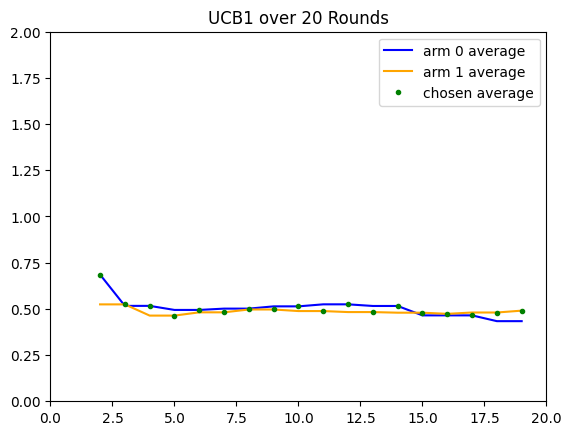

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import scipy.stats
from IPython.display import HTML

np.random.seed(704_0)

# rewards will be drawn uniformly randomly from these ranges

K = 2
reward_true_ranges = [[0.0, 0.8], [0.4, 0.6]]
T_max = 10000

arm_counts = [0 for _ in range(K)]
arm_totals = [0 for _ in range(K)]
arm_averages = [None for _ in range(K)]
chosen_averages = []

def sample_reward(j):
    r = np.random.uniform(reward_true_ranges[j][0], reward_true_ranges[j][1])

    chosen_averages.append(arm_averages[j])

    arm_counts[j] += 1
    arm_totals[j] += r
    arm_averages[j] = arm_totals[j] / arm_counts[j]
    return r

# sample each arm once
for t in range(K):
    sample_reward(t)

arm_averages_history = []
ucb1_bounds_history = []

# sample using UCB1
for t in range(K, T_max):
    # calculate the UCB1 bound for each arm
    ucb1_bounds = [arm_averages[j] + math.sqrt(2 * math.log(t) / arm_counts[j]) for j in range(K)]

    arm_averages_history.append(arm_averages.copy())
    ucb1_bounds_history.append(ucb1_bounds)

    # pick and sample the arm with the highest bound
    j = np.argmax(ucb1_bounds)
    sample_reward(j)

arm_averages_history = np.array(arm_averages_history)
ucb1_bounds_history = np.array(ucb1_bounds_history)
chosen_averages = np.array(chosen_averages)

def plot(T, bounds=True):
    average0 = plt.plot(range(K, T), arm_averages_history[:T-K,0], label="arm 0 average", color="blue")
    if bounds:
        ucb1_bound0 = plt.plot(range(K, T), ucb1_bounds_history[:T-K,0], label="arm 0 bound", color="blue", linestyle="--")
    average1 = plt.plot(range(K, T), arm_averages_history[:T-K,1], label="arm 1 average", color="orange")
    if bounds:
        ucb1_bound1 = plt.plot(range(K, T), ucb1_bounds_history[:T-K,1], label="arm 1 bound", color="orange", linestyle="--")

    if T <= 100:
        chosen_average = plt.plot(range(K, T), chosen_averages[K:T], label="chosen average", color="green", linestyle="none", marker=".")

    plt.legend()
    plt.title(f"UCB1 over {T} Rounds")
    plt.xlim(0, T)
    plt.ylim(0, 2)

    plt.show()

plot(20, bounds=False)

Script:
* This chart shows the values calculated after trying each arm once,
* The solid lines show the running average rewards of each arm.
* The dashed lines show the UCB1 upper confidence bounds.
* The choices are shown with the green dots where the $y$ value is the average of the arm they chose, so you can see arms chosen despite worse stats.
* The first arm starts with the higher average, and its running average does not drop below the second arm until after 15 rounds.
* This is partially because many of the arm choices are on the second arm which has a similar average at this point.
* Let's take a look at what the bounds have been doing during this time.

## UCB1 Bounds over 20 Rounds


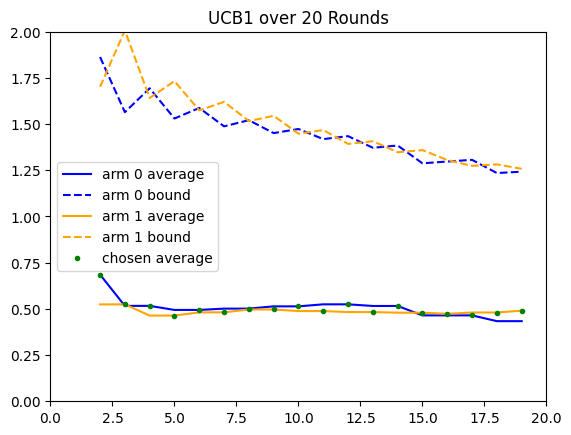

In [ ]:
plot(20)

Script:
* Interestingly, the bounds for both arms are staying close to each other.
* Why is this?
* First, if an arm is chosen, the upper bound only goes down a little bit unless its average changes a lot which will only happen early on.
* Second, the bounds for the arms not chosen will go up a little bit since the total number of choices is included.
* So the bound of the arm chosen will tend to decrease and the other bounds will increase keeping them close to each other.
* If you look at how they go back and forth and cross each other, then you can see how they take turns with the highest bound and being chosen.
* Let's look how this evolves over more rounds.

## UCB1 over 100 Rounds


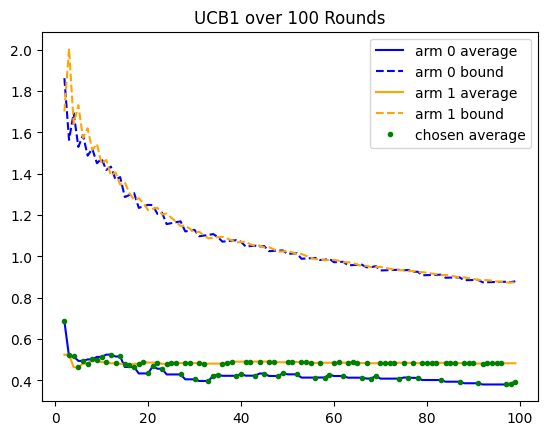

In [ ]:
plot(100)

Script:
* Here, you can see how the process evolved over 100 rounds.
* The initial overestimate for the first arm is sufficiently corrected after about 20 rounds, and after that most of the samples are on the second arm.
* There are still occasional samples on the worse first arm, but you can see them becoming less frequent.
* The upper pressure of the UCB1 formula is decreasing at this point; the logarithm in the numerator is growing more slowly, so the better second arm gets more time before the bounds cross and they switch briefly.


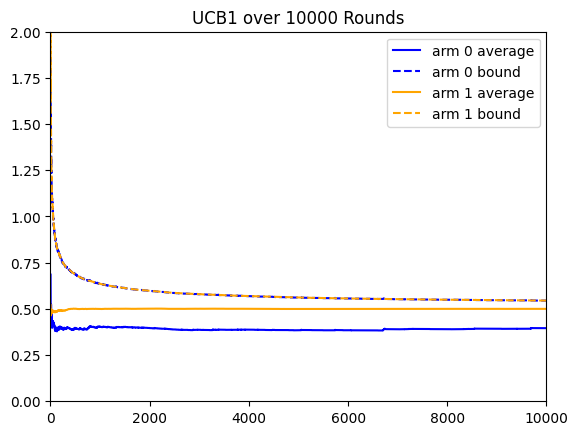

In [ ]:
plot(10000)

Script:
* If we look at more rounds, we will see that the gap between the upper bounds and the best arm's average will continue to drop.
* As this happens, the averages will dominate the selection process, and fewer and fewer choices will try the worse arms.


Script:
* The UCB1 algorithm is a clever way to force a smooth mix of exploitation exploration in bandit problems.
* It's pretty easy to argue for occasional sampling from the original formula.
* But watching the bounds over time gives a much more clear intuition of why UCB1 is constantly balancing the mix of arms.